# IBM Applied Data Science Capstone Project / PART- II

## Best Neighborhood Research for Opening a Restaurant in Eindhoven (Centrum)

### Table of Contents:

Introduction<br>
Description and Background of the Problem<br>
Description of the Data<br>
The Stages of the Project<br>
> 1) Download and Explore Dataset<br>
> 2) Show Neighborhoods of Eindhoven (Centrum) on Map<br>
> 3) Create Datasets For Comparison<br>
> 4) Arrange The DataFrames<br>
> 5) Comparison of Neighborhoods

Result of the Project<br>
Discussion about the Project<br>
Conclusion of the Project<br>

### A. Introduction:

This is a project proposal paper for the final weeks of the “Capstone Project” of the “IBM Applied Data Science Capstone Course”. In this project, I would like to examine the best neighborhood in Eindhoven (The Netherlands) for the entrepreneurs in order to open a new restaurant. During the project, I will use Python language, python data science libraries (NumPy, Pandas), machine learning algorithms(clustering), visualization of data (Seaborn, MatPlotLib) and foursquare API, etc.

This project will be an additional resource (not main) for the entrepreneurs who would like to open a new restaurant in Eindhoven (Centrum).

### B. Description and Background of the Problem:

In the project, I will analyze the Eindhoven city center of the Netherlands. As you may know, Eindhoven is the fifth-largest city and a municipality of the Netherlands, located in the south of the country. It had a population of 231,469 in 2019, making it the largest city in the province of North Brabant. Neighboring cities and towns include Son en Breugel, Nuenen, Geldrop-Mierlo, Helmond, Heeze-Leende, Waalre, Veldhoven, Eersel, Oirschot and Best. The agglomeration has a population of 337,487. The metropolitan area consists of 419,045 inhabitants. The city region has a population of 753,426. (Source: https://en.wikipedia.org/wiki/Eindhoven ; access date: 15.04.2020)

According to TripAdvisor, there are around 200 restaurants in Eindhoven and most of them take place in the heart of the city. When I read the comments regarding those restaurants, there is always a gap for a high-quality restaurant in Eindhoven.

As it is well known, deciding the location and neighborhood for a restaurant is a vital step for the start-ups and entrepreneurs. The importance may be equal or more than the decoration, the menu quality, foods, and cooks as well. Therefore, my question is simple and basic: Where is the best place for a new restaurant in Eindhoven.

When I did a quick search on the internet regarding the importance of the locations of restaurants, I found an article named "4 Important Factors When Choosing a Location to Open a Restaurant". The article summarizes the four vital factors for the locations of the restaurants. These which are;

- Parking: A restaurant should have its own parking lot. If that isn’t an option (for example, in major cities), consider partnering with a hotel in the area that has its own parking options. Also, it has an acceptable distance to public parking lots.

- Accessibility: There’s a reason that major restaurant chains are often located near highway exits: It makes them accessible for customers. Also, it is a good option to close distance to public transportations. Light Rail Station, Metro Station, Train/Tram Station, Bus Stops around the restaurant is to provide convenience for customers.

- Visibility: This goes along with accessibility and is very important for new restaurant locations. People have to know the restaurant is there, either in person or on their mobile devices.

- Population Base: There need to be enough people who live in or pass through the area regularly to keep the restaurant busy. So "the particular area's population base" is another important factor in a suitable place for a new restaurant.

In accordance with the above factors, I can say Eindhoven has a population advantage with its huge industry and well-known companies such as Philips, Here, etc. as well as the Technical University of Eindhoven. The population base factor is suitable for Eindhoven. However, due to lack of data, I will focus on the first two factors: Parking and Accessibility and will collect data about them.

### C. Description of the Data:
For solving the problem, it is clear that we need a different type of data. Which are:

- List of neighborhoods of Eindhoven
- Car Parking list and their geolocations of Eindhoven
- Bus Station list and their geolocations of Eindhoven

When I searched on the internet, I found the "open source of the Eindhoven" web site(open.eindhoven.nl), where publishes formal, regular statistical datasets in various issues. 

The second and third datasets are the point of interest (POI)and it is easy to reach them by Foursquare API. So, I get the data via the Foursquare API.

### D. The Stages of the Project:

#### 1st Stage - Importing the relevant libraries for the project.

In [1]:
import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.distance import geodesic
from statistics import mean
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None # disable chained assignments

#### 2nd Stage:  Download and Explore Datasets

In order to determine the best neighborhood/street in Eindhoven(Centrum), at first I need the neighborhoods list of Eindhoven. Also I should get the latitude and longitude coordinates of each neighborhoods/streets. 

After searching on the internet, I found a public eindhoven postcode dataset. It is free and public dataset produced by the "data.Eindhoven.nl" https://data.eindhoven.nl/api/datasets/1.0/postcode-buurt-wijk/attachments/straat_buurt_wijk_xls/

In [2]:
filename = "https://data.eindhoven.nl/api/datasets/1.0/postcode-buurt-wijk/attachments/straat_buurt_wijk_xls/"
#df_eindhoven_data= pd.read_excel(filename)
df_eindhoven_data=pd.read_csv('postcode-buurt-wijk.csv', delimiter=';')
df_eindhoven_data.shape

(5647, 16)

As we may see the result in the dataset; there is 5647 row and 16 column exist.<br>
Firstly, we want to know the details of data:

In [3]:
list(df_eindhoven_data.columns) 

['STRAATNAAM',
 'POSTCODE6',
 'POSTCODE4',
 'HSNR_laag',
 'HSNR_hoog',
 'HSNR_aant',
 'BUURTCODE',
 'BUURTNAAM',
 'WIJKCODE',
 'WIJKNAAM',
 'STADSDEELCODE',
 'STADSDEELNAAM',
 'x_rd',
 'y_rd',
 'latitude',
 'longitude']

There is 5 columns that we need: Straatnaam, Buurtnaam, Wijknaam and coordinates.

In [4]:
df_eindhoven_data=df_eindhoven_data[['STRAATNAAM','BUURTNAAM','WIJKNAAM','latitude', 'longitude']]
df_eindhoven_data.head()

,STRAATNAAM,BUURTNAAM,WIJKNAAM,latitude,longitude
0,'s Gravesandestraat,Limbeek-Noord,Wijk Oud-Woensel,51.450411,5.463251
1,'s-Gravenbrakelstraat,Tempel,Wijk Aanschot,51.480183,5.487506
2,'t College,Binnenstad,Wijk Centrum,51.437284,5.481565
3,'t Hofke,'t Hofke,Wijk Oud-Tongelre,51.448200,5.519199
4,'t Hofke,'t Hofke,Wijk Oud-Tongelre,51.449185,5.520176


In [5]:
df_eindhoven_data['WIJKNAAM'].value_counts()

Wijk Ontginning             417
Wijk Aanschot               408
Wijk Putten                 393
Wijk Erp                    387
Wijk Achtse Molen           382
Wijk Oud-Gestel             335
Wijk Halve Maan             318
Wijk Dommelbeemd            317
Wijk Begijnenbroek          295
Wijk Oud-Stratum            285
Wijk Oud-Strijp             255
Wijk Oud-Tongelre           248
Wijk Oud-Woensel            237
Wijk Centrum                227
Wijk Kortonjo               222
Wijk Gestelse Ontginning    215
Wijk Meerhoven              207
Wijk Doornakkers            185
Wijk Rozenknopje            161
Wijk De Laak                153
Name: WIJKNAAM, dtype: int64

Because my focus is Centrum we limit the dataset with Eindhoven Centrum.

In [6]:
df_eindhoven_data=df_eindhoven_data[df_eindhoven_data['WIJKNAAM']=='Wijk Centrum']
df_eindhoven_data.shape

(227, 5)

Finally, I arrange the column names and reindex the dataframe
Also, create a new column, which I will use it later on for comparing the neighborhoods.

In [7]:
df_eindhoven_data.rename(columns={'STRAATNAAM': 'Street','BUURTNAAM': 'Neighborhood', 'longitude':'Longitude', 'latitude':'Latitude' },inplace=True)
df_eindhoven_data['CarPark_Dist']=0
df_eindhoven_data['Close_Bus/Train']=0
df_eindhoven = df_eindhoven_data[['Street','Neighborhood', 'Latitude', 'Longitude','CarPark_Dist','Close_Bus/Train']].reset_index(drop=True)
df_eindhoven.head()

,Street,Neighborhood,Latitude,Longitude,CarPark_Dist,Close_Bus/Train
0,'t College,Binnenstad,51.437284,5.481565,0,0
1,Antonie van Hemertstraat,Binnenstad,51.440263,5.484746,0,0
2,Augustijnendreef,Binnenstad,51.438833,5.484829,0,0
3,Bergstraat,Bergen,51.436538,5.476265,0,0
4,Bogert,Fellenoord,51.444172,5.473344,0,0


I need to check whether there is null values or not.

In [8]:
df_eindhoven.isnull().sum()

Street             0
Neighborhood       0
Latitude           0
Longitude          0
CarPark_Dist       0
Close_Bus/Train    0
dtype: int64

In [9]:
df_eindhoven.shape

(227, 6)

 The data for neighborhoods of Eindhoven is ready.

#### 2. Show Neighborhoods of Eindhoven on Map

At first, to show the locations of Neighborhoods/Streets on a map, we need locate the coordinates that are latitude and longitude info of Eindhoven. I use __geopy library__ to get the latitude and longitude values of Eindhoven.<br>
Then, to define an instance of the geocoder, I should define a user_agent. I will name our agent "_myapplication_", as shown below.

In [10]:
address = 'Eindhoven'
geolocator = Nominatim(user_agent="myapplication")
location = geolocator.geocode(address)
ams_latitude = location.latitude
ams_longitude = location.longitude
print(f'The geograpical coordinate of Eindhoven is: {ams_latitude}, {ams_longitude}')

The geograpical coordinate of Eindhoven is: 51.44855695, 5.450122521857143


Now, we can create a map of Eindhoven with neighborhoods.

In [11]:
# create map
map_eindhoven = folium.Map(location=[ams_latitude, ams_longitude], zoom_start=13)

# add markers to map
for lat, lng, Street in zip(df_eindhoven['Latitude'], df_eindhoven['Longitude'], df_eindhoven['Street'] ):
    label = '{}'.format(Street)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_eindhoven)  
    
map_eindhoven

#### 3. Create DataSets For Comparison

I need 2 datasets for comparison between the neighborhoods/streets. As I explained in "_Description of the Data_" section, I need; 
- Car Parking list and their geolocations of Eindhoven
- Bus Station list and their geolocations of Eindhoven<br>

I may get these data via Foursquare Api.
At first, I should connect the Foursquare Api.

In [39]:
CLIENT_ID =  'X' # Foursquare ID
CLIENT_SECRET = 'X'# Foursquare Secret
VERSION = '20180604'
LIMIT = 100 #response limit
print('Foursquare Credentails is:\nCLIENT ID\t:',CLIENT_ID,'\nCLIENT SECRET\t:',CLIENT_SECRET)

Foursquare Credentails is:
CLIENT ID	: X 
CLIENT SECRET	: X


__DataSet of Parking Lots__

I can reach to __Parking Lots Locations__ via Foursquare Api with _Parking CategaoryId_. In <a href="https://developer.foursquare.com/docs/resources/categories">Foursquare</a> web site, I have learned that the categoryId of Parking is "4c38df4de52ce0d596b336e1".

In [13]:
# some defination
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 3000 # define radius
categoryId='4c38df4de52ce0d596b336e1' #categoryId of Parking

#create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ams_latitude, 
    ams_longitude, 
    radius,
    categoryId,
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NZWVSLDM0LJ5DUVKZKHIIDHHAQW5YHP1YEES351M12BMW1LI&client_secret=2DQHUJE11QZ2MUUAMZE3UW3PSDCOYDJ3CJTN1FE1R3J35O2Y&v=20180604&ll=51.44855695,5.450122521857143&radius=3000&categoryId=4c38df4de52ce0d596b336e1&limit=100'

Send the GET request and examine the resutls

In [14]:
results = requests.get(url).json()
results 

{'meta': {'code': 200, 'requestId': '5ea70e8660ba08001b42052e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Eindhoven',
  'headerFullLocation': 'Eindhoven',
  'headerLocationGranularity': 'city',
  'query': 'parking',
  'totalResults': 37,
  'suggestedBounds': {'ne': {'lat': 51.475556977000025,
    'lng': 5.493365265014104},
   'sw': {'lat': 51.42155692299997, 'lng': 5.406879778700182}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '556075b6498e025ae995f73e',
       'name': 'Strijp S Parking',
       'location': {'lat': 51.44804023362553,
        'lng': 5.458170720862233,
        'labeledLatLngs': [{'label': 'display',
          'lat': 51.44804023362553,
          'lng': 5.4

Before we proceed, let's borrow the __get_category_type__ function from the Foursquare

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json data and structure it into a pandas dataframe as __df_park__.

In [16]:
parking = results['response']['groups'][0]['items']
    
df_park = json_normalize(parking) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_park =df_park.loc[:, filtered_columns]

# filter the category for each row
df_park['venue.categories'] = df_park.apply(get_category_type, axis=1)


# clean columns
df_park.columns = [col.split(".")[-1] for col in df_park.columns]

df_park.head()

,name,categories,lat,lng
0,Strijp S Parking,Parking,51.448040,5.458171
1,P1 Klokgebouw,Parking,51.448168,5.458379
2,Parkplaats Boschdijk,Parking,51.445020,5.470998
3,Parking Mathildelaan,Parking,51.441254,5.473330
4,'t Eindje,Parking,51.442794,5.474453


And It can be printed the __parking lots number__ in dataframe <br>(venues returned by Foursquare)

In [17]:
print('{} parking lots were returned by Foursquare.'.format(df_park.shape[0]))

37 parking lots were returned by Foursquare.


I can save the dataframe as csv for further reference. <br>

In [18]:
df_park.to_csv('park_eindhoven.csv')

__DataSet of Bus Stops__

I can reach __Bus Stops Locations__ via Foursquare Api with _CategaoryId_. In <a href="https://developer.foursquare.com/docs/resources/categories">Foursquare</a> web site, I have learned that the categoryIds as;

- Bus Station categoryId is "4bf58dd8d48988d1fe931735"



At first, we create the Bus/Train Stops categoryID List:

In [19]:
#create the Bus Stops categoryID List:
category_list=['4bf58dd8d48988d1fe931735'] #bus station
c=0
df_trans_tot=pd.DataFrame()

In [20]:
# some defination
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 3000 # define radius
categoryId='4bf58dd8d48988d1fe931735' #categoryId of Bus stops

#create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ams_latitude, 
    ams_longitude, 
    radius,
    categoryId,
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NZWVSLDM0LJ5DUVKZKHIIDHHAQW5YHP1YEES351M12BMW1LI&client_secret=2DQHUJE11QZ2MUUAMZE3UW3PSDCOYDJ3CJTN1FE1R3J35O2Y&v=20180604&ll=51.44855695,5.450122521857143&radius=3000&categoryId=4bf58dd8d48988d1fe931735&limit=100'

In [21]:
 #Send the GET request and examine the resutls    
results = requests.get(url).json()  
transportation = results['response']['groups'][0]['items']
df_trans = json_normalize(transportation) # flatten JSON  

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']

    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
## Now we are ready to clean the json data and structure it into a pandas dataframe as df_trans
    
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_trans =df_trans.loc[:, filtered_columns]
    
# filter the category for each row
df_trans['venue.categories'] = df_trans.apply(get_category_type, axis=1)
    
# clean columns
df_trans.columns = [col.split(".")[-1] for col in df_trans.columns]

print('For Category ID {} : {}'.format(category_list[c], df_trans.shape))
    
# Update the dataframe
df_trans_tot=df_trans_tot.append(df_trans).reset_index(drop=True)

For Category ID 4bf58dd8d48988d1fe931735 : (32, 4)


Let's see the __df_trans__ dataframe

In [24]:
df_trans.head()

,name,categories,lat,lng
0,Busstation Eindhoven,Bus Station,51.443641,5.478712
1,Looierstraat,Bus Station,51.452719,5.477489
2,Internationale Bushalte / International bus st...,Bus Station,51.445627,5.480965
3,Bus 401: Eindhoven Centraal Station - Eindhove...,Bus Line,51.443770,5.478735
4,Busstation WoensXL,Bus Station,51.467087,5.474844


And we can print the total Bus Station number in dataframe 

In [25]:
print('Total Bus Station is:',df_trans_tot.shape[0])

Total Bus Station is: 32


I save the dataframe as csv for further reference.<br>

In [26]:
df_trans.to_csv('transportation_eindhoven.csv')

In [27]:
df_eindhoven.head()

,Street,Neighborhood,Latitude,Longitude,CarPark_Dist,Close_Bus/Train
0,'t College,Binnenstad,51.437284,5.481565,0,0
1,Antonie van Hemertstraat,Binnenstad,51.440263,5.484746,0,0
2,Augustijnendreef,Binnenstad,51.438833,5.484829,0,0
3,Bergstraat,Bergen,51.436538,5.476265,0,0
4,Bogert,Fellenoord,51.444172,5.473344,0,0


#### 4. Arrange The DataFrames

Now, we have 3 different DataFrames, which are;
- Neighborhoods (__df_eindhoven__)
- Parking Lots Locations (__df_park__)
- Bus Stops Locations (__df_trans_tot__) 

In this step, we merge the dataframes.

Firstly, we calculate the average distance of all "_parking lot_" for each neighborhood. While we calculate the distance, we limit the distance with two digit after decimal point. 

Then, we add the result to the "CarPark_Dist" column of the __df_eindhoven__ dataframe.

In [28]:
#Average Distance Between Parking Lots and Neighborhoods
geolocator = Nominatim(user_agent="myapplication")
n=0
m=0
dist_list=[]
while True:
    if n < df_eindhoven['Street'].count():
        for m in range(df_park['name'].count()):
            location1=list(df_eindhoven.loc[n,'Latitude':'Longitude'])
            location2=list(df_park.loc[m,'lat':'lng'])
            dist=float('%.1f' % geodesic(location1,location2).m)
            dist_list.append(dist)
        #print('{} {} is: {} meters'.format(n+1,(df_eindhoven.loc[n,'Street']),('%.1f' % mean(dist_list)))
        df_eindhoven.loc[df_eindhoven.index[n], 'CarPark_Dist'] = ('%.1f' % mean(dist_list)) #Update The Neighborhood DataFrame
        df_eindhoven['CarPark_Dist']=pd.to_numeric(df_eindhoven['CarPark_Dist']) #Change the 'CarPark Dist' Column Type as float
        n+=1
    else:
        print('The average distance of all {} parking lots calculated for all {} neighborhoods and added to df_eindhoven dataframe'.format((df_park.shape[0]), df_eindhoven.shape[0]))
        break

The average distance of all 37 parking lots calculated for all 227 neighborhoods and added to df_eindhoven dataframe


Let's see the __df_eindhoven__ dataframe

In [29]:
df_eindhoven.head()

,Street,Neighborhood,Latitude,Longitude,CarPark_Dist,Close_Bus/Train
0,'t College,Binnenstad,51.437284,5.481565,1324.3,0
1,Antonie van Hemertstraat,Binnenstad,51.440263,5.484746,1340.7,0
2,Augustijnendreef,Binnenstad,51.438833,5.484829,1356.2,0
3,Bergstraat,Bergen,51.436538,5.476265,1341.5,0
4,Bogert,Fellenoord,51.444172,5.473344,1323.4,0


Secondly, we calculate the total 'Light Rail/Metro/Train/Tram/Bus Station number' for each neighborhood if the distance of stops below than 1.000 meters<br>
Then, we add the result to the "Close Bus/Train" column of the __df_amsterdam__ dataframe.

In [30]:
#Bus/Train Station Number in Neighborhood
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.distance import geodesic
from statistics import mean
geolocator = Nominatim(user_agent="myapplication")
n=0
m=0
p=0
while True:
    if n < df_eindhoven['Street'].count():
        for m in range(df_trans_tot['name'].count()):
            location1=list(df_eindhoven.loc[n,'Latitude':'Longitude'])
            location2=list(df_trans_tot.loc[m,'lat':'lng'])
            dist=float('%.1f' % geodesic(location1,location2).m)
            if dist<=1000: #We set 1000meter distance
                p+=1
        #print(n+1, df_eindhoven.loc[n,'Street'],'has:', p, 'close bus/train stop')
        df_eindhoven.loc[df_eindhoven.index[n], 'Close_Bus/Train'] = p #Update The Neighborhood DataFrame
        n+=1
        p=0
    else:
        print('The total number of all {} close Bus stops for all {} neighborhood is calculated and added to df_eindhoven dataframe'.format((df_trans_tot.shape[0]), df_eindhoven.shape[0]))
        break

The total number of all 32 close Bus stops for all 227 neighborhood is calculated and added to df_eindhoven dataframe


Let's see the __df_eindhoven__ dataframe

In [31]:
df_eindhoven.head()

,Street,Neighborhood,Latitude,Longitude,CarPark_Dist,Close_Bus/Train
0,'t College,Binnenstad,51.437284,5.481565,1324.3,28
1,Antonie van Hemertstraat,Binnenstad,51.440263,5.484746,1340.7,28
2,Augustijnendreef,Binnenstad,51.438833,5.484829,1356.2,28
3,Bergstraat,Bergen,51.436538,5.476265,1341.5,27
4,Bogert,Fellenoord,51.444172,5.473344,1323.4,29


#### 5. Comparison of Neighborhoods

In this step we can start to comparison of neighborhoods to determine the best suitable location for a new restaurant in Eindhoven(Centrum).
We sort the neighborhods from the average distance of parking lots and create a new dataframe as __df_comparison__ with first 20 neighborhods.

In [32]:
df_eindhoven=df_eindhoven.sort_values('CarPark_Dist', ascending=True).reset_index(drop=True)
df_comparison=df_eindhoven.head(20)
df_comparison

,Street,Neighborhood,Latitude,Longitude,CarPark_Dist,Close_Bus/Train
0,Mathildelaan,Witte Dame,51.441678,5.472259,1289.2,28
1,Gedempte Gracht,Binnenstad,51.438722,5.481126,1289.9,28
2,Heilige Geeststraat,Bergen,51.436906,5.473836,1290.4,27
3,Markt,Binnenstad,51.439177,5.478323,1291.5,28
4,Gagelstraat,Witte Dame,51.440742,5.470442,1292.4,28
5,Markt,Binnenstad,51.439053,5.478771,1294.4,28
6,Molenveld,Binnenstad,51.435798,5.483860,1294.5,26
7,Nieuwstraat,Binnenstad,51.440272,5.478904,1294.9,28
8,Fellenoord,Fellenoord,51.442789,5.472840,1295.0,28
9,Catharinaplein,Binnenstad,51.437184,5.479967,1296.0,28


Before starting to compare, we __normalize__ the data in "CarPark_Dist" and	"Close_Bus/Train" columns and create 2 new columns as _'CarPark_Dist_N'_ and _'Close_Bus/Train_N'_.

In [33]:
df_comparison['CarPark_Dist_N']=df_comparison['CarPark_Dist'].max()-df_comparison.CarPark_Dist
df_comparison['CarPark_Dist_N']=df_comparison['CarPark_Dist_N']/df_comparison['CarPark_Dist_N'].max()
df_comparison['Close_Bus/Train_N'] = df_comparison['Close_Bus/Train']/df_comparison['Close_Bus/Train'].max() #normalize
df_comparison

,Street,Neighborhood,Latitude,Longitude,CarPark_Dist,Close_Bus/Train,CarPark_Dist_N,Close_Bus/Train_N
0,Mathildelaan,Witte Dame,51.441678,5.472259,1289.2,28,1.000000,1.000000
1,Gedempte Gracht,Binnenstad,51.438722,5.481126,1289.9,28,0.957055,1.000000
2,Heilige Geeststraat,Bergen,51.436906,5.473836,1290.4,27,0.926380,0.964286
3,Markt,Binnenstad,51.439177,5.478323,1291.5,28,0.858896,1.000000
4,Gagelstraat,Witte Dame,51.440742,5.470442,1292.4,28,0.803681,1.000000
5,Markt,Binnenstad,51.439053,5.478771,1294.4,28,0.680982,1.000000
6,Molenveld,Binnenstad,51.435798,5.483860,1294.5,26,0.674847,0.928571
7,Nieuwstraat,Binnenstad,51.440272,5.478904,1294.9,28,0.650307,1.000000
8,Fellenoord,Fellenoord,51.442789,5.472840,1295.0,28,0.644172,1.000000
9,Catharinaplein,Binnenstad,51.437184,5.479967,1296.0,28,0.582822,1.000000


We can visualize the results in bar plot

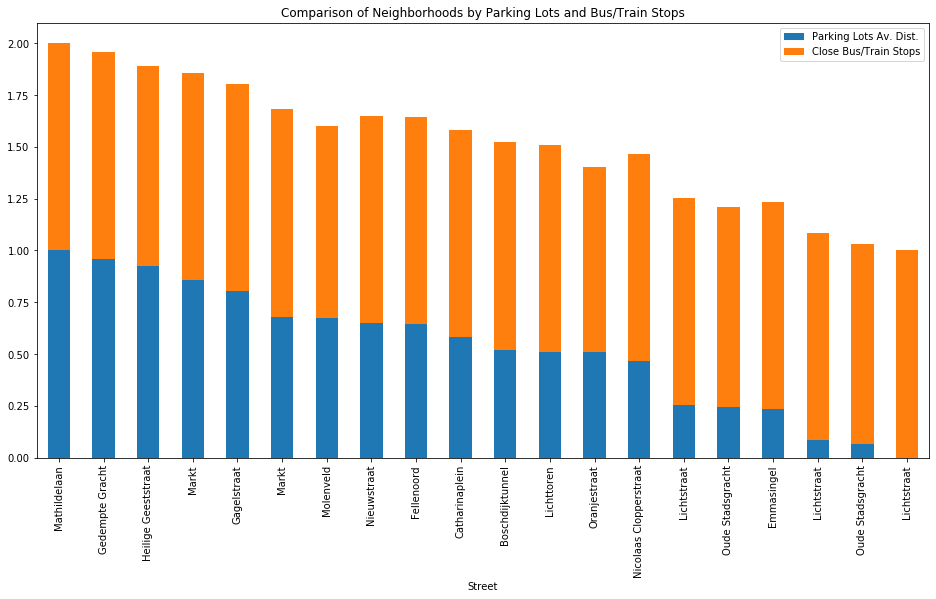

In [34]:
df_comparison.plot.bar(x="Street", y=["CarPark_Dist_N", "Close_Bus/Train_N"],stacked=True,figsize=(16,8))
plt.xlabel('Street') # x-label to the plot
plt.title('Comparison of Neighborhoods by Parking Lots and Bus/Train Stops') # title to the plot
plt.legend(('Parking Lots Av. Dist.', 'Close Bus/Train Stops'),loc=1) #legend of the plot
plt.show()

__Finally, we can get the comparison result__ and save the result in a new dataframe as *df_result*

In [35]:
df_comparison['Total']=df_comparison['CarPark_Dist_N']+df_comparison['Close_Bus/Train_N'] #create a new column
df_result=(df_comparison[df_comparison['Total'] == df_comparison['Total'].max()]).reset_index(drop=True) #return the max value and create a 
df_result

,Street,Neighborhood,Latitude,Longitude,CarPark_Dist,Close_Bus/Train,CarPark_Dist_N,Close_Bus/Train_N,Total
0,Mathildelaan,Witte Dame,51.441678,5.472259,1289.2,28,1.0,1.0,2.0


__The result,__

In [36]:
print('The best neighborhood for a new restaurant in Eindhovan(Centrum) is : {}'.format(df_result.at[0,'Street']))

The best neighborhood for a new restaurant in Eindhovan(Centrum) is : Mathildelaan


There detail of parking lots which are below 500 meters distance

In [37]:
n=0
m=0
for m in range(df_park['name'].count()):
    location1=list(df_result.loc[0,'Latitude':'Longitude'])
    location2=list(df_park.loc[m,'lat':'lng'])
    dist=float('%.1f' % geodesic(location1,location2).m)
    #dist_list.append(dist)
    if dist<500:
        n+=1
        print('Between {} and {} is {} meters'.format((df_result.loc[0,'Street']),(df_park.at[m,'name']),dist))
    else:
        continue
print('There are {} parking lots exist in {} below 500 meters distance'.format(n,df_result.at[0,'Street']))

Between Mathildelaan and Parkplaats Boschdijk is 382.0 meters
Between Mathildelaan and Parking Mathildelaan is 88.2 meters
Between Mathildelaan and 't Eindje is 196.7 meters
Between Mathildelaan and Q-Park De Bijenkorf is 276.5 meters
Between Mathildelaan and Garage, Lichttoren is 188.1 meters
Between Mathildelaan and P1 Parking de Witte Dame is 231.1 meters
Between Mathildelaan and Q-Park De Admirant is 327.8 meters
Between Mathildelaan and Piazza is 300.5 meters
There are 8 parking lots exist in Mathildelaan below 500 meters distance


Finally, we can create a map of Eindhoven(Centrum) with;
- The result (best neighborhood) as RED circle marker
- Parking Lots as BLUE circle markers
- Light Bus Stations as ORANGE circle markers

In [38]:
result_latitude=df_result.at[0,'Latitude']
result_longitude=df_result.at[0,'Longitude']
result_name=df_result.at[0,'Neighborhood']

result_map = folium.Map(location=[ams_latitude, ams_longitude], zoom_start=14) # generate map centred around Ecco


# show neighborhood as a red circle mark
folium.features.CircleMarker(
    [result_latitude, result_longitude],
    radius=10,
    popup=result_name,
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(result_map)


# add Parking Lots to the map as blue circle markers
for lat, lng, label in zip(df_park.lat, df_park.lng, df_park.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(result_map)
    

# add Light Rail/Metro/Train/Tram/Bus Station to the map as orange circle markers
for lat, lng, label in zip(df_trans_tot.lat, df_trans_tot.lng, df_trans_tot.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='orange',
        fill_color='orange',
        fill_opacity=0.6
        ).add_to(result_map)

# display map
result_map

### Result of the Project:

As I mentioned before, in this project, I would like to determine the best neighborhood/street in Eindhoven(Centrum) for the entrepreneurs to open a new restaurant. With this understanding, I scrapped the (free and public) "post code list" of Eindhoven from the "data.eindhoven.nl".  In the dataset, there were 5647 rows and 16 columns. However, due to our focus, I limited the work with Centrum. When I limited the dataset with Eindhoven Centrum, __the datasets shape droped to 227 streets with their geolocations__.

For comparison between the streets, I needed the lists of "Parking Lots" and "Bus Station" with their geolocations. I got these data via Foursquare Api. Through Foursquare web site, I have learned that the categoryIds of our venues' (Parking and Bus Stops) and used these Ids to get and create the datasets. 

- 37 Parking Lots
- 32 Bus Stops

Then, I calculated the average distance of all "parking lot"  for each street and calculated the total Bus Stops number" below than 1000meters for each street. Of course, I added the result the main dataframe.

Before starting to compare, I needed to normalize the data and then sum up these two new columns and reached the result. In the project, finally, I reached that  in "__The best street for a new restaurant in Eindhoven (Centrum) is : Mathildelaan". 

The Nes e.o. has;
- 28 Bus Stations in 1000 meters distance
- The average distance  for  Parking Lots is 1289.2 meters
- There are 8 parking lots exist below 500 meters distance

### Discussion about the Project:

At first, this is a trainee project. It needs more proffessional approach.

Secondly, it can be used more datasets to determine the location with less error. 

Thirdly, we can add another dataset adding to parking lots and bus stops.  

The project has some diffiuclties but finally, it is a trainee project.

### Conclusion of the Project:

This project is a part of "Capstone Project" of Coursera - "IBM Applied Data Science Capstone Course". In the project, I  used most of the python scripts, libraries, visualization of data, foursquare api.. etc. So our first aim is to use them in a systematically.

In this project, I would like to determine the best street in Eindhoven for the entrepreneurs to open a new restaurant. I compared 227 streets with "the average distance of all parking lot" and "the Bus Station/Stops number below than 1000meters". 

After comparing the streets with these two factor, I reached the conclusion that "__The best neighborhood for a new restaurant in Eindhoven(Centrum) is : Mathildelaan"
<br>

Mathildelaan has;

- 28 Bus Stations in 1000 meters distance
- The average distance for Parking Lots is 1289.2 meters
- There are 8 parking lots exist below 500 meters distance